# Title: Big Data Analysis for optimizing Services and Marketing strategies for Airline Companies using Passenger’s Twitter data by sentiment analysis

## Project Overview
> * Social media such as Twitter is a powerful tool for customer feedback due to the public nature of the feedback. We explore how airline companies can benefit from the customer feedback on Twitter by analyzing a dataset composed of tweets on major airline companies from 2015, categorizing the words in individual tweets as “positive”, “negative”, or “neutral, and creating a classifier for future tweet analyzing. Data Visualizations and analysis is done to better understand the nature of the airlines data.


## Dataset Overview

> * In this project, we will analyze the dataset from Kaggle (https://www.kaggle.com/crowdflower/twitter-airline-sentiment) which contains 14,640 tweets posted in February 2015. These tweets are form the passenger comments after their flight with different airline companies. This dataset already contains a sentiment analysis which divides the comments into three types: positive, neutral, and negative.

> * This dataset and be used to analyze how travelers in February 2015 expressed their feelings on Twitter for different airline companies. The dataset is in the form of CSV file and SQLite database. We choose to use CSV file in our project. It is nice, clear, and already in an organized format where one row has all the information about one Tweet. The data has already been worked out on Mongodb to join the categorical data based on the category id. The final dataset after exporting is saved to csv file format and is named as "dataset.csv"


## Initial research questions 
> * Question 1. Which feedback (positive, negative, neutral) type is most preeminent? Which airline is the worst and best according to the tweet feedbacks?
***
> *Question 2. Which words are the most frequently used in tweets, for all positive, negative and neutral feedbacks?

## Hypothesis

> * We did the presumption that most people today express their emotions by providing negative feedbacks to certain products or services to which they are dissatisifed with, especially on the online platforms like twitter. Likewise, in the domain of aviation the most common reasons on why negative feebacks are likely to be seen more in comparision to positive ones could be that the customers are seeking to express their views through these online platforms and recompensate for a negative experience they could have had with their flight experiences. Another major reason could be to warn other potential customers from spending their valuable time and money on some product or services which they might had a bad experience with. 

> * Moreover, during the research done on the airlines companies we also assume that the most negative feedbacks could be given to United Airlines out of all the other airlines company as many incidents regarding poor customer service and carelessness were recorded during the year of 2011 to 2015. 

### Algorithms used: 
* Logistic Regression 
* Random Forest Classifier
* Support Vector Classifier
* Naive Bayes 


### Loading necessary packages

In [48]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
import string
import operator
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sushant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
# load the dataset created after Mongodb lookup 
df = pd.read_csv('dataset.csv')
df.head()

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment_result,airline
0,5.700000e+17,1.0000,NaN,NaN,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada),neutral,Virgin America
1,5.700000e+17,0.3486,NaN,0.0000,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada),positive,Virgin America
2,5.700000e+17,0.6837,NaN,NaN,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada),neutral,Virgin America
3,5.700000e+17,1.0000,Bad Flight,0.7033,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada),negative,Virgin America
4,5.700000e+17,1.0000,Can't Tell,1.0000,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada),negative,Virgin America


In [50]:
# name of the columns present
df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline_sentiment_gold', 'name',
       'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_result',
       'airline'],
      dtype='object')

## Column defination of the dataset

- tweet_id: Tweet ID
- airline_sentiment_confidence: Confidence with which the given sentiment was determined
- negativereason: The reason of each negative comment
- negativereason_confidence: Confidence with which the negative reason of tweet was predicted
- airline_sentiment_gold: Information not given
- name: The username of each Twitter account
- negativereason_gold: Information not given
- retweet_count: The number of re-posting of each Tweet
- text: The content of each Tweet
- tweet_coord: Information not given (maybe user's tweeted geographical location latitude & longitude)
- tweet_created: The exact time each tweet was posted
- tweet_location: Information not given
- user_timezone: The time zone that each user was in
- sentiment_result: Sentiment of each Tweet (Positive, Neutral, Negative), target variable
- airline: The name of the airline company

In [51]:
# shape of the dataset
print("The dataset has {0} rows and {1} columns".format(df.shape[0],df.shape[1]))

The dataset has 14640 rows and 15 columns


In [52]:
df.dtypes

tweet_id                        float64
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
sentiment_result                 object
airline                          object
dtype: object

In [53]:
# null values %
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

tweet_id                         0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
sentiment_result                 0.00
airline                          0.00
dtype: float64

## Findings

There are 14,640 rows and 15 columns. Features included are: tweet id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence, airline_sentiment_gold, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, user_timezone, sentiment_result, airline. 

Columns like negativereason_gold, tweet_coord, airline_sentiment_gold have the highest % of null values. These columns have more than 90% missing data. It will be better to delete these columns as they will not provide any constructive information.

In [54]:
# Check out the frequency of all possible values in negativereason_gold, airline_sentiment_gold, retweet_count and tweet_coord

df['negativereason_gold'].value_counts()

Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight Attendant Complaints     1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Flight Attendant Complaints                  1
Customer Service Issue\nLost Luggage         1
Customer Service Issue\nCan't Tell           1
Name: negativereason_gold, dtype: int64

In [55]:
df['airline_sentiment_gold'].value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [56]:
df['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: retweet_count, dtype: int64

In [57]:
df['tweet_coord'].value_counts()

[0.0, 0.0]                      164
[40.64656067, -73.78334045]       6
[32.91792297, -97.00367737]       3
[40.64646912, -73.79133606]       3
[35.22643463, -80.93879965]       2
                               ... 
[40.69429232, -74.17208436]       1
[37.61833841, -122.38389799]      1
[37.61859126, -122.38385699]      1
[45.58931882, -122.5959928]       1
[40.64946781, -73.76624703]       1
Name: tweet_coord, Length: 832, dtype: int64

According to the printed rows and column names above, there are four columns that are not very useful, negativereason_gold, airline_sentiment_gold, retweet_count and tweet_coord. On the one hand, some of them have a large number of unmeaningful values. For example, in 'retweet_count' 13873 rows out of 14640 rows have a value 0. As for 'airline_sentiment_gold', only 40 rows out of 14640 rows have a value, with empty values for all others. On the other hand, some of the columns are not very useful for us, such as 'negativereason_gold' and 'tweet_coord'. Therefore, we can remove these columns in order to keep our dataset clean, so we can develop our analysis more clearly based on the information given.

We have also dropped tweet_location, tweet_created, user_timezone and name (username) as these pieces of data will not contribute to our analysis.

In [58]:
df.drop('negativereason_gold', axis=1, inplace=True)
df.drop('airline_sentiment_gold', axis=1, inplace=True)
df.drop('retweet_count', axis=1, inplace=True)
df.drop('tweet_coord', axis=1, inplace=True)

df.drop('tweet_location', axis=1, inplace=True)
df.drop('tweet_created', axis=1, inplace=True)
df.drop('user_timezone', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)

In [59]:
# Check the current list of columns
list(df.columns)

['tweet_id',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'text',
 'sentiment_result',
 'airline']

In [60]:
# dataframe after removing unnecessary columns

df.head()

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,text,sentiment_result,airline
0,5.700000e+17,1.0000,NaN,NaN,@VirginAmerica What @dhepburn said.,neutral,Virgin America
1,5.700000e+17,0.3486,NaN,0.0000,@VirginAmerica plus you've added commercials t...,positive,Virgin America
2,5.700000e+17,0.6837,NaN,NaN,@VirginAmerica I didn't today... Must mean I n...,neutral,Virgin America
3,5.700000e+17,1.0000,Bad Flight,0.7033,@VirginAmerica it's really aggressive to blast...,negative,Virgin America
4,5.700000e+17,1.0000,Can't Tell,1.0000,@VirginAmerica and it's a really big bad thing...,negative,Virgin America


# Data Analysis and Visulaization

###  Question 1: Which feedback (positive, negative, neutral) type is most prominent? 

### Getting the count of neutral, positive and negative comments

In [61]:
sentiments = df['sentiment_result'].unique()
#here we know there are 3 types only 
sentiments

array(['neutral', 'positive', 'negative'], dtype=object)

The data has an airline_sentiment_confidence value (Confidence with which the given sentiment was determined) which is a float. We can sum up the values for that to determine whether the count for negative is higher than neutral and positive combined. Since the highest value for the confidence is 1, if the confidence for the sentiment is 100%, it will conveniently add 1 to our count for total number of negative comments. Otherwise, we will be adding a decimal value to our total, since the confidence of that sentiment isn't 100%, only a portion will count.

In [62]:
# get the total sum of negative, positive and neutral feedbacks

total_negative = df[df['sentiment_result'] == 'negative']['airline_sentiment_confidence'].sum()
# print(total_negative)
total_positive = df[df['sentiment_result'] == 'positive']['airline_sentiment_confidence'].sum()
# print(total_positive)
total_neutral = df[df['sentiment_result'] == 'neutral']['airline_sentiment_confidence'].sum()
# print(total_neutral)

values = [total_neutral, total_positive, total_negative]
dictionary1 = {'Airline Sentiment':sentiments, 'Count':values} 

dfSentimentCount = pd.DataFrame(dictionary1)
dfSentimentCount.head(3)

,Airline Sentiment,Count
0,neutral,2551.4171
1,positive,2060.6280
2,negative,8566.4269


### Visulalization of the count for negative, positive and neutral feedbacks

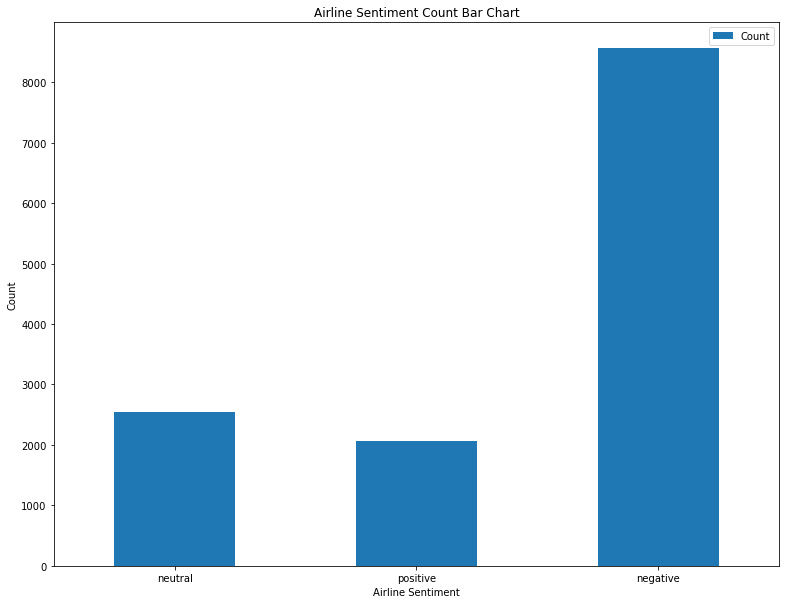

In [63]:
temp = dfSentimentCount.plot.bar(x='Airline Sentiment', y='Count', rot=0, figsize=(13,10))

#tile and labels 
plt.title('Airline Sentiment Count Bar Chart')
plt.xlabel('Airline Sentiment')
plt.ylabel('Count')
plt.show()

Here, we can clearly observe that the tweets tweeted by different users are overwhelming with negative sentiments. The first assumption/ hypothesis we did came true. The number of negative feedbacks are very high compared to that of positive and neutral feedbacks.  

### So what could be the reasons for such high the negative feedbacks and dissatisfaction? 
- We can analyze this question by going through the column 'negative reason' and discover the reasons which led users to give negative ratings

In [64]:
negativereason_values_count= df['negativereason'].value_counts()
print(negativereason_values_count)
print("All negative resons :" ,(negativereason_values_count).sum())

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64
All negative resons : 9178


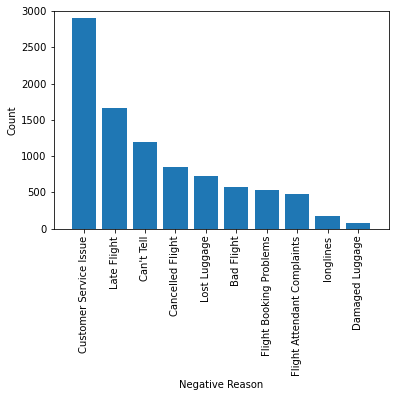

In [65]:
# plot a bar graph to see the negative reasons distribution
x = (df['negativereason']).value_counts().keys()
x_pos = np.arange(len(x))
y = (df['negativereason'].value_counts()).values


barlist = plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x,rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('Count')
plt.xlim(-1,len(x) )
plt.ylim(0,3000)

plt.show()

So, the major reason for negative sentiment to the airlines as a whole was seen to be Customer Service Issue, followerd by late flight and can't tell.

### Question 1. (part 2) Which airline is the worst and best according to the tweet feedbacks?

#### Count the positive, neutral and negative feedback for each airline

In [66]:
# get the name of airlines, 

airlines = df['airline'].unique()
airlines

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

### Gather the total count of each feedbacks for every airline and create a dataframe. The total count of feebacks will also consider the sentiment confidence per airlines.

In [67]:
# creating list to later append the neutral, positive, negative and total counts of feedback
count_neutral =[]
count_positive=[]
count_negative=[]
count_total=[]


In [68]:
for airline in airlines:
    #the .query() function filters the airlines and sentiment result based on the feedback (positive, negative & neutral)
    neutral_c = df.query("airline == @airline and sentiment_result == 'neutral'")['airline_sentiment_confidence'].sum()
    positive_c = df.query("airline == @airline and sentiment_result == 'positive'")['airline_sentiment_confidence'].sum()
    negative_c = df.query("airline == @airline and sentiment_result == 'negative'")['airline_sentiment_confidence'].sum()
    # calculate total count
    total_c = neutral_c + positive_c + negative_c
    count_neutral.append(neutral_c)
    count_positive.append(positive_c)
    count_negative.append(negative_c)
    count_total.append(total_c)

In [69]:
#create dataframe for each airline
df2 = pd.DataFrame(index=airlines)
df2['Neutral Count'] = count_neutral
df2['Positive Count'] = count_positive
df2['Negative Count'] = count_negative
df2

,Neutral Count,Positive Count,Negative Count
Virgin America,143.3610,134.9727,163.2137
United,564.4000,421.1578,2457.5967
Southwest,548.5365,505.0800,1091.7521
Delta,599.5580,471.7084,861.6031
US Airways,313.1524,231.2555,2140.1501
American,382.4092,296.4536,1852.1112


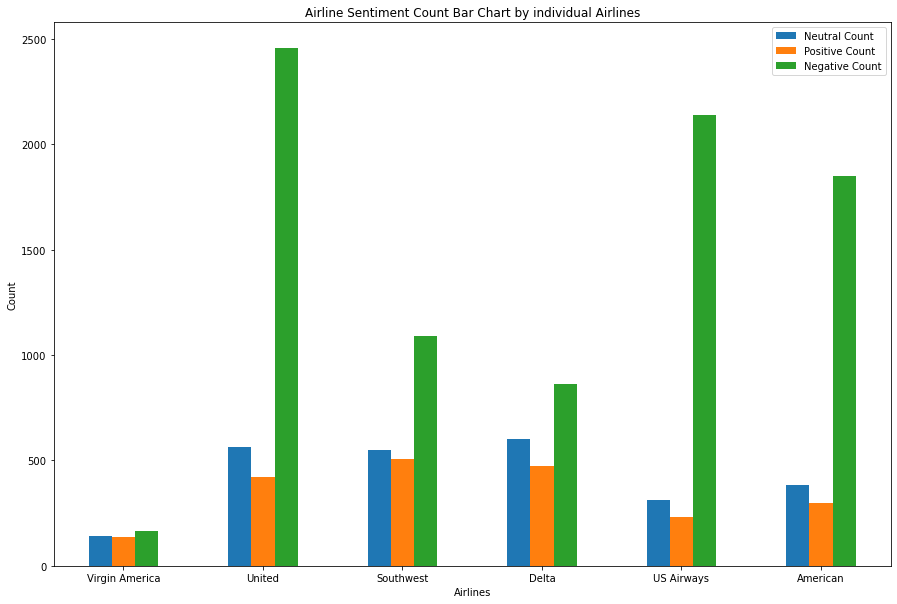

In [70]:
## Visualization of each airlines sentiment count

plt2 = df2.plot.bar(rot=0, figsize=(15,10))

plt.title('Airline Sentiment Count Bar Chart by individual Airlines')
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.show()

From the above bar chart, we can observe the count of negative, postive and neutral of different airlines seperately. The negative count is highlighted as green, positive count as orange followed by neutral count as blue. Accordingly, we can also observe that United airlines has the most negative feedback count. The Virgin America airlines has the lowerst count for all three sentiment feedbacks.

### Separating each individual sentiment count into three different bar graph to get the clear understanding

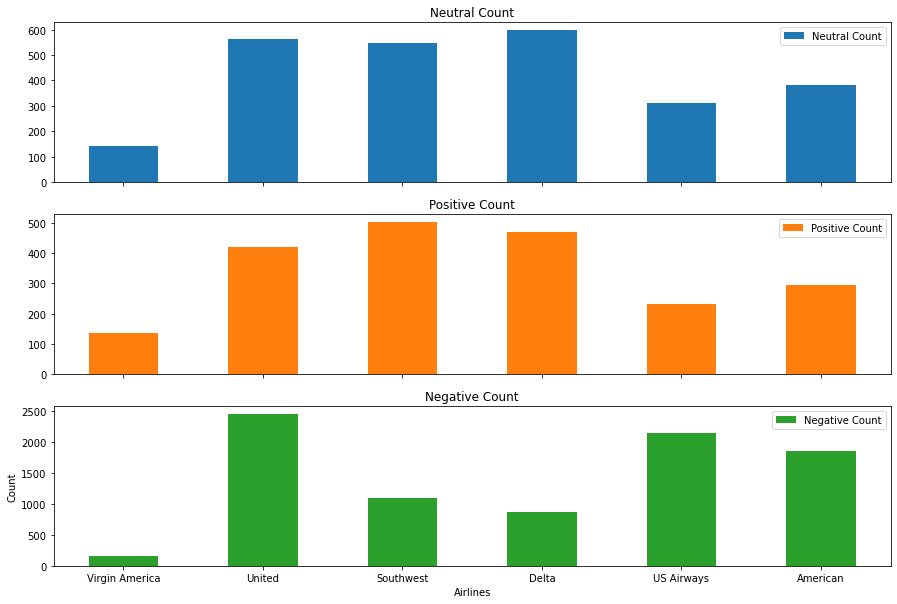

In [71]:
plt3 = df2.plot.bar(rot=0, subplots=True, figsize=(15,10))
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.show()

From the above individual bar chart , we can clearly observe that united airlines has the most total amount of negative count followed by US Airways. But, here we are only taking into the consideration of the negative feedback received. If we take into account of the postivie feedback as well, could US airlines have a higher percent of negative feedback?

For this, we need to calculate the percentage of feedback which is negative to the total count. From this, we can make a fair comparision among the sentiments for different airlines

In [72]:
neg_percent = []

for neg, tot in zip(count_negative, count_total):
    percent = neg/tot
    neg_percent.append(percent)

In [73]:
# store obtained % into dataframe for all airlines
neg_df = pd.DataFrame(index=airlines)
neg_df['Negative Feedback %'] = neg_percent
neg_df

,Negative Feedback %
Virgin America,0.369640
United,0.713763
Southwest,0.508888
Delta,0.445764
US Airways,0.797208
American,0.731778


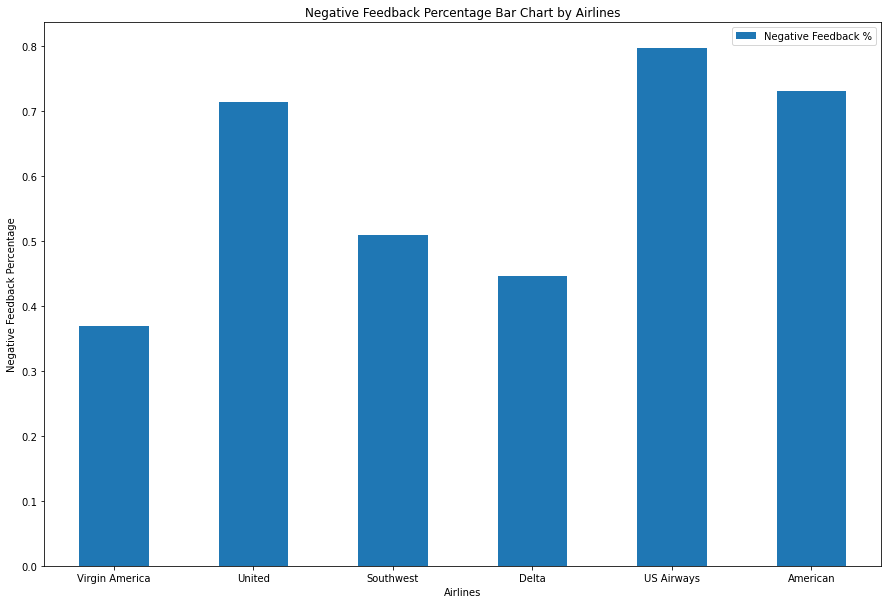

In [74]:
# Visulaizing the negative feedbacks
plt4 = neg_df.plot.bar(rot=0, figsize=(15,10))
plt.title('Negative Feedback Percentage Bar Chart by Airlines')
plt.xlabel('Airlines')
plt.ylabel('Negative Feedback Percentage')
plt.show()

Here after some analysis, in the above bar plot we can clearly see that US Airways has the highest percent of negative feedback, followed by United Airlines to which we assumed that United Airlines might have the most negative feedbacks considering their records of carelessness and incidents regarding poor customer service. So, the hypotesis we assumed was contradicted. 

### Airlines with highest positive feedback percentage

In [75]:
pos_percent = []

for pos, tot in zip(count_positive, count_total):
    percent = pos/tot
    pos_percent.append(percent)

In [76]:
# store obtained % into dataframe for all airlines
pos_df = pd.DataFrame(index=airlines)
pos_df['Positive Feedback %'] = pos_percent
pos_df

,Positive Feedback %
Virgin America,0.305681
United,0.122317
Southwest,0.235428
Delta,0.244046
US Airways,0.086143
American,0.117130


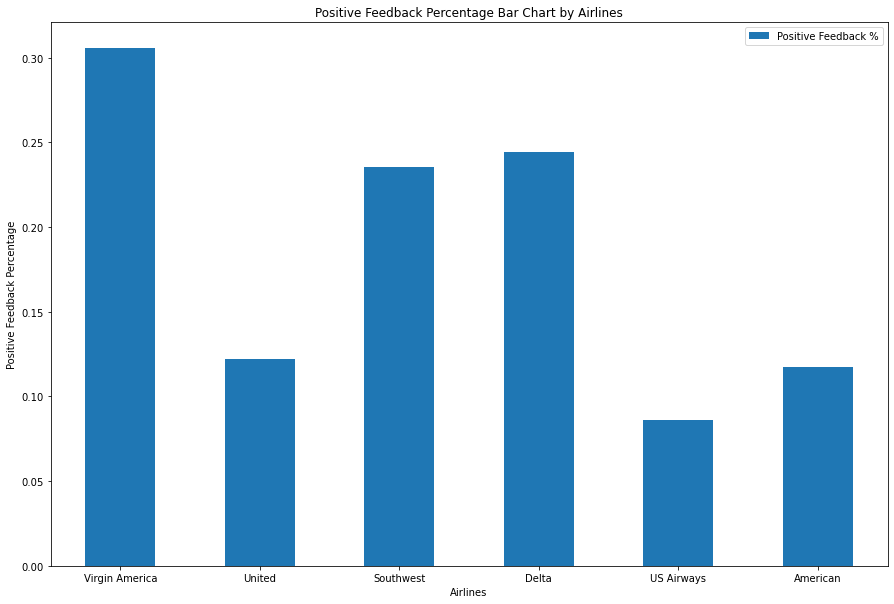

In [77]:
# Visulaizing the positive feedbacks
plt5 = pos_df.plot.bar(rot=0, figsize=(15,10))
plt.title('Positive Feedback Percentage Bar Chart by Airlines')
plt.xlabel('Airlines')
plt.ylabel('Positive Feedback Percentage')
plt.show()

From the above bar chart, we can observe that Virgin America has the most positive feedback percentage followed by Delta and Southwest Airlines.

### Question 2: Which words are the most frequently used in tweets, for all positive, negative and neutral feedbacks?

In [78]:
df.text[:3]

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
Name: text, dtype: object

The tweets text is the most important column to determine the sentiment of the users. This tweet text column contains lots of unmeaningful words that does not aids in the analysis. The text is also seen to be having special characters like @ denoting the airline name and user names, empty strings and so on. So we need to removes these unmeaningful words from the text column

In [79]:
# check stopwords list, (!! must download the stopwords list from nltk package)
stopwordslist = set(stopwords.words('english'))

In [80]:
# print(stopwordslist)

In [81]:
# group all unwanted words
airline_names =["united", "usairways", "americanair" ,"southwestair", "deltaair", "virginamericair" ,"flight"]
allunWantedwords= list(stopwordslist) + airline_names


Now, we need to separate each type of sentiment tweets(tweets for positive, negative and neutral), for example: the neg_tweets contains all the tweets text whose sentiment_result column value is 'negative' which is then same for positive and neutral.

In [82]:
tweets = df['text']
# negative tweets
neg_tweets = df[df["sentiment_result"] =="negative"]["text"]
# neutral tweets
neut_tweets = df[df["sentiment_result"] =="neutral"]["text"]
# positive tweets
pos_tweets = df[df["sentiment_result"] =="positive"]["text"]

In [83]:
# function to remove stop words, remove airline names, words starts with @ 

def pre_processData(data):
  
    data =list(data)
    new_data =[]
    
    
    for l in range(len(data)):
        line = data[l]
        line = line.lower()
        line=' '.join(word for word in line.split() if not word.startswith('@'))
        querywords = line.split()  
        resultwords  = [word for word in querywords if word not in stopwordslist]
        resultwords2  = [word for word in resultwords if word not in airline_names]

        newline = ' '.join(resultwords2)       
        newline = newline.translate(str.maketrans('', '', string.punctuation))
        new_data.append(newline)
        
    return new_data

In [84]:
#pre_process tweets from the negative,  positive and neutral
neg_tweets= pre_processData(neg_tweets)
neut_tweets= pre_processData(neut_tweets)
pos_tweets= pre_processData(pos_tweets)

In [85]:
#function to get most k frequent words in a set of tweets

def getFrequentWords(textList, k):  #k frequent words
    texts = ' '.join(textList)
    split_it = texts.split() 
    count = Counter(split_it) 
    most_occur = count.most_common(k) 

    print (most_occur)
    return most_occur

In [86]:
print("Most frequent 10 words in negative tweets are:" )
negwords = getFrequentWords(neg_tweets,10)

Most frequent 10 words in negative tweets are:
[('get', 982), ('cancelled', 920), ('service', 740), ('hours', 644), ('help', 610), ('hold', 607), ('customer', 604), ('time', 583), ('2', 556), ('im', 531)]


Here we can observe that the frequency of words such as get, cancelled, service, hours, help are most frequent. It shows that these words are clearly connected with complaint and dissatisfaction. For example the word 'cancelled' in the tweets shows that flight cancellation maybe the case why customers are tweeting their negative feedback.

In [87]:
print("Most frequent 10 words in neutral tweets are:" )
neut_words =getFrequentWords(neut_tweets,10)

Most frequent 10 words in neutral tweets are:
[('get', 238), ('please', 179), ('flights', 167), ('need', 163), ('help', 160), ('thanks', 154), ('im', 130), ('would', 122), ('dm', 121), ('us', 108)]


Here we can observe that the frequency of words such as please, need, thanks are most frequent. It shows that these words are kind of neutral in comparison with words used in positive tweets and negative.

In [88]:
print("Most frequent 10 words in positive tweets are:" )
pos_words= getFrequentWords(pos_tweets,10)

Most frequent 10 words in positive tweets are:
[('thanks', 608), ('thank', 453), ('you', 260), ('great', 233), ('service', 159), ('love', 132), ('get', 114), ('customer', 113), ('much', 109), ('guys', 109)]


Here we can observe that the frequency of words such as thanks, thank, great, love are most frequent. It shows that these words are clearly connected with user satisfaction towards the airlines in their tweets.

## Text Visualization using Wordcloud

- Wordcloud provides representation of the most frequent words with a larger font size to communicate the research findings. The less frequent words are also represented with small font size. 

In [89]:
# wordcloud function 
def getWordCloud(texts):
    texts =" ".join(texts)
    wordcloud = WordCloud(stopwords=allunWantedwords,
                          background_color='white',
                          width=2000,
                          height=2000
                         ).generate(texts)
    
    return wordcloud

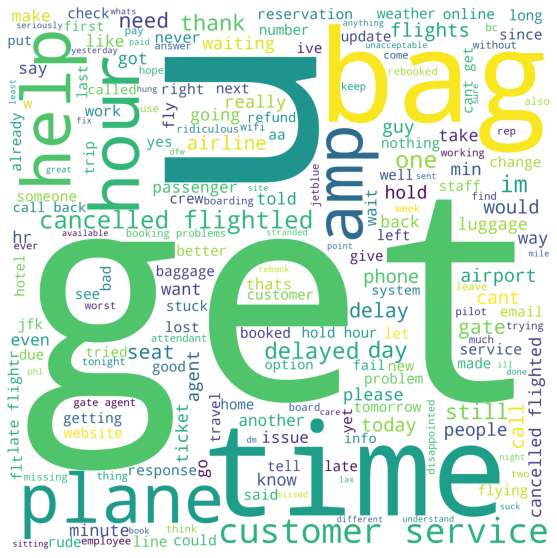

In [93]:
#negative tweets word cloud 
neg_wordcloud = getWordCloud(neg_tweets)
plt.figure(1,figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.show()

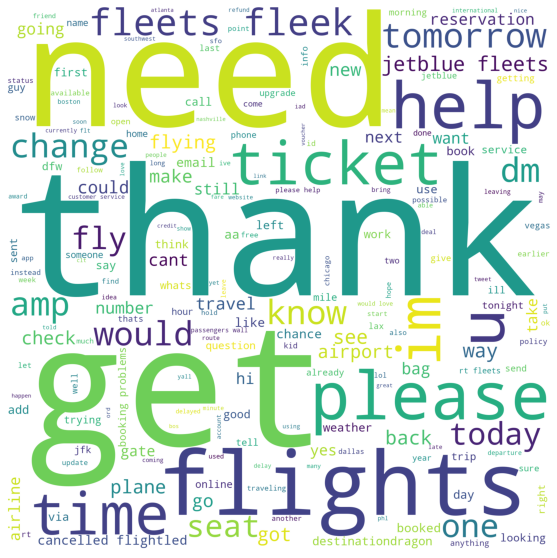

In [91]:
#neutral tweets word cloud 
neut_wordcloud = getWordCloud(neut_tweets)
plt.figure(2,figsize=(10, 10))
plt.imshow(neut_wordcloud)
plt.axis('off')
plt.show()

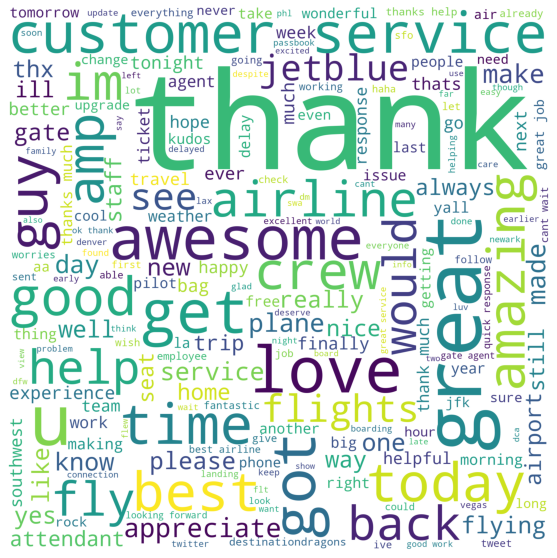

In [92]:
#positive tweets word cloud 
pos_wordcloud = getWordCloud(pos_tweets)
plt.figure(2,figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.show()

# Feature Engineering

After all the visualization of data, understanding of each features in the dataset is done, we need to build a sentiment prediction model. So for this process the two columns: text column and the sentiment_result column are taken as the main features to determine sentiment for different texts.

### Target label (sentiment_result) and feature (text)

In [94]:
# first clean the text column of the dataset by calling the function pre_processData(), 
# pre_processData(), removes the stop words, remove airline names, words starting with @ 

tweets = pre_processData(df['text'])

In [95]:
#initilize a dataframe to store the feature and target variabls
final_df = pd.DataFrame()
final_df['text'] = tweets
final_df['airline_sentiment'] = df['sentiment_result']

In [96]:
final_df.head()

,text,airline_sentiment
0,said,neutral
1,plus added commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative


### Converting the labels (airline_sentiment) to integers
- negative: 0
- neutral: 1
- positive: 2

In [97]:
final_df.loc[:,('airline_sentiment')] = final_df.airline_sentiment.map({'negative':0, 'neutral':1,'positive':2})
final_df.head()

,text,airline_sentiment
0,said,1
1,plus added commercials experience tacky,2
2,today must mean need take another trip,1
3,really aggressive blast obnoxious entertainmen...,0
4,really big bad thing,0


In [98]:
# store tweets text in x & the target label in y
x=  final_df['text'].values
y= final_df['airline_sentiment'].values

In [99]:
#split data into training & test with 15% of data as test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.15, random_state=42)

print("x_train size:" ,x_train.shape, ", y_train size: ", len(y_train))
print("x_test size: ",x_test.shape, ", y_test size: ", len(y_test))

x_train size: (12444,) , y_train size:  12444
x_test size:  (2196,) , y_test size:  2196


# Build Prediction Models

For buliding ML models, the model cannot deal with the words directly. For example, the text or x feature which contains the users' tweets. It is a necessary step to first encode the text word to numbers. We can do so by using the CountVectorizer and TfidfVectorizer. 

> * CountVectorizer: It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

> * Reference taken from: https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/#:~:text=CountVectorizer%20is%20a%20great%20tool,occurs%20in%20the%20entire%20text.

In [100]:
# import countVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(x_train)
test_features=v.transform(x_test)

In [102]:
#convert from sparse (contain a lot of zeros) to dense
final_train_features=train_features.toarray()
final_test_features= test_features.toarray()
print('Train: ',final_train_features.shape)
print('Test: ',final_test_features.shape)

Train:  (12444, 14366)
Test:  (2196, 14366)


### CountVectorizer with Logistic Regression

In [103]:
clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
clf.fit(final_train_features, y_train)

LogisticRegression(max_iter=200)

In [104]:
predictions_train = clf.predict(final_train_features)
predictions_test = clf.predict(final_test_features)

In [57]:
accuracy = accuracy_score(predictions_train,y_train)
print(" Logistic Regression Train accuracy is: {:.4f}".format(accuracy))

accuracy = accuracy_score(predictions_test,y_test)
print(" Logistic Regression Test accuracy is: {:.4f}".format(accuracy))

 Logistic Regression Train accuracy is: 0.9473
 Logistic Regression Test accuracy is: 0.7919


In [58]:
#print other performance measures, espically the data is unbalanced
print(classification_report(predictions_test , y_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1482
           1       0.56      0.61      0.59       402
           2       0.67      0.74      0.71       312

    accuracy                           0.79      2196
   macro avg       0.71      0.74      0.72      2196
weighted avg       0.80      0.79      0.80      2196



<AxesSubplot:>

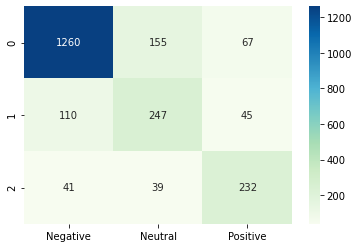

In [59]:
# confusion matrix for CountVectorizer with Logistic regression
cm=(pd.DataFrame(confusion_matrix(predictions_test , y_test), columns=['Negative', 'Neutral', 'Positive']))
sns.heatmap(cm, annot=True, fmt="d",cmap='GnBu')

> * So, by using the CountVectorizer for encoding the tweets and applying the Logistic regression algorithm as prediction model, the accuracy achieved was 79% for tweet sentiment. 

### CountVectorizer with Random Forest Classifier model

In [60]:
random_clf = RandomForestClassifier(n_estimators=10)
random_clf.fit(final_train_features, y_train)

RandomForestClassifier(n_estimators=10)

In [61]:
predictions_train = random_clf.predict(final_train_features)
predictions_test = random_clf.predict(final_test_features)

In [62]:
random_accuracy = accuracy_score(predictions_train,y_train)
print("Random Forest Train accuracy is: {:.4f}".format(random_accuracy))

random_accuracy = accuracy_score(predictions_test,y_test)
print("Random Forest Test accuracy is: {:.4f}".format(random_accuracy))

Random Forest Train accuracy is: 0.9822
Random Forest Test accuracy is: 0.7564


In [63]:
print(classification_report(predictions_test , y_test))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1550
           1       0.45      0.58      0.51       347
           2       0.58      0.67      0.62       299

    accuracy                           0.76      2196
   macro avg       0.64      0.69      0.66      2196
weighted avg       0.78      0.76      0.77      2196



<AxesSubplot:>

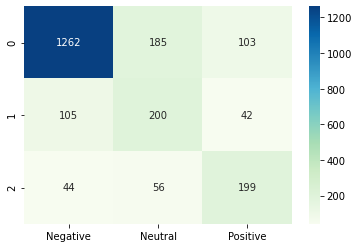

In [64]:
cm=(pd.DataFrame(confusion_matrix(predictions_test , y_test), columns=['Negative', 'Neutral', 'Positive']))
sns.heatmap(cm, annot=True, fmt="d",cmap='GnBu')

> * So, by using the CountVectorizer for encoding the tweets and applying the Random Forest algorithm as prediction model, the accuracy achieved was 76% for tweet sentiment.

## Using TfidfVectorizer

> * TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator. vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index.

> * Reference taken from: https://stackoverflow.com/questions/25902119/scikit-learn-tfidfvectorizer-meaning#:~:text=TfidfVectorizer%20%2D%20Transforms%20text%20to%20feature,token%20gets%20a%20feature%20index.

> * parameter definations: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [65]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(x_train)
train_features =  tfidf_vect.transform(x_train)
test_features =  tfidf_vect.transform(x_test)

In [66]:
# print(train_features)
# print(test_features)

In [67]:
#convert from sparse (contain a lot of zeros) to dense
final_train_features=train_features.toarray()
final_test_features= test_features.toarray()

### TfidfVectorizer with Logistic Regression

In [68]:
clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
clf.fit(final_train_features, y_train)

LogisticRegression(max_iter=200)

In [69]:
predictions_train = clf.predict(final_train_features)
predictions_test = clf.predict(final_test_features)

In [70]:
train_accuracy = accuracy_score(predictions_train,y_train)
print("Logisitc regression Train accuracy is: {:.4f}".format(train_accuracy))

test_accuracy = accuracy_score(predictions_test,y_test)
print("Logisitc regression Test accuracy is: {:.4f}".format(test_accuracy))

Logisitc regression Train accuracy is: 0.8623
Logisitc regression Test accuracy is: 0.7992


In [71]:
print(classification_report(predictions_test , y_test))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1611
           1       0.48      0.68      0.57       312
           2       0.63      0.79      0.70       273

    accuracy                           0.80      2196
   macro avg       0.68      0.77      0.72      2196
weighted avg       0.84      0.80      0.81      2196



> * So, by using the TfidfVectorizer for encoding the tweets text and applying the Logistic Regression algorithm as prediction model, the accuracy achieved was 80% for tweet sentiment.

### TfidfVectorizer with Random Forest Classifier

In [72]:
rand_clf = RandomForestClassifier(n_estimators=10)
rand_clf.fit(final_train_features, y_train)

RandomForestClassifier(n_estimators=10)

In [73]:
predictions_train = rand_clf.predict(final_train_features)
predictions_test = rand_clf.predict(final_test_features)

In [74]:
rand_accuracy = accuracy_score(predictions_train,y_train)
print("Random forest Train accuracy is: {:.4f}".format(rand_accuracy))

rand_accuracy = accuracy_score(predictions_test,y_test)
print("Random forest Test accuracy is: {:.4f}".format(rand_accuracy))

Random forest Train accuracy is: 0.9784
Random forest Test accuracy is: 0.7655


In [75]:
print(classification_report(predictions_test , y_test))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85      1581
           1       0.47      0.61      0.53       338
           2       0.57      0.70      0.63       277

    accuracy                           0.77      2196
   macro avg       0.65      0.71      0.67      2196
weighted avg       0.80      0.77      0.78      2196



> * So, by using the TfidfVectorizer for encoding the tweets text and applying the Random Forest Classifier algorithm as prediction model, the accuracy achieved was 77% for tweet sentiment.

### Overview

> * Both accuracy results of Logistic regression model and Random Forest Classifier along with encoding technique (CountVectorizer & TdifdVectorizer are nearly same)
> * Both models are seen to be having the overfitting issue, as traning accuracy reaches around 85%-95% whereas test accuracy reaches around 75%-80%
> * Both the models can achieve even higher performance with more fine parameter-tuning.

## Build model with Support Vector Classification (SVC) and Naive Bayes

In [78]:
#initilize a dataframe to store the feature and target variabls
f_df = pd.DataFrame()
f_df['text'] = tweets
f_df['airline_sentiment'] = df['sentiment_result']

In [81]:
f_df.head()

,text,airline_sentiment
0,said,neutral
1,plus added commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative


In [82]:
#split data into training & test with 20% of data as test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(f_df, test_size=0.2, random_state=42)

In [84]:
X_train = train['text'].values
X_test = test['text'].values
y_train = train['airline_sentiment']
y_test = test['airline_sentiment']

In [87]:
print(X_train.shape, y_train.shape)

(11712,) (11712,)


In [88]:
print(y_test.shape, y_test.shape)

(2928,) (2928,)


In [89]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

print("The shape of train vector is", train_vectors.shape)
print("The shape of test vector is", test_vectors.shape)

The shape of train vector is (11712, 13810)
The shape of test vector is (2928, 13810)


In [92]:
#fit svc model
svc = svm.SVC()
clf = svc.fit(train_vectors, y_train)

In [94]:
predicted = clf.predict(test_vectors)
print("Predicted result:", predicted)
print("Accuracy score from linear SVC model:", accuracy_score(y_test, predicted))

Predicted result: ['positive' 'negative' 'negative' ... 'negative' 'negative' 'neutral']
Accuracy score from linear SVC model: 0.7868852459016393


In [97]:
# fit naive bayes
nb = MultinomialNB()
clf2 = nb.fit(train_vectors, y_train)

In [99]:
predicted2 = clf2.predict(test_vectors)
print("Predicted result:", predicted2)
print("Accuracy score from Naive Bayes model:", accuracy_score(y_test, predicted2))

Predicted result: ['positive' 'negative' 'negative' ... 'negative' 'negative' 'negative']
Accuracy score from Naive Bayes model: 0.6974043715846995


> * Here, by using both Support Vector Classifier (SVC model) and Naive Bayes model we can see the SVC model has higher accuracy compared to Naive Bayes model which is 78% > 69%.